In [1]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

Using TensorFlow backend.


In [4]:
#preproessing-img aumentation----avoid overfitting
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
#zoom-random
#enough transformations
test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(
        'C:/Users/Anbu/Desktop/resp/chest_xray/train',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

test_set = test_datagen.flow_from_directory(
        'C:/Users/Anbu/Desktop/resp/chest_xray/test',
        target_size=(64,64),
        batch_size=256,
        class_mode='binary')


Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [7]:
#init creates object of class
classifier=Sequential()
#changes for thaneo
#activation fn-rectifier
classifier.add(Convolution2D(64,3,3,input_shape=(64,64,3),activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))

classifier.add(Convolution2D(32,3,3,input_shape=(64,64,3),activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))


classifier.add(Flatten())
#full connwection--output either sigmoid or softmax
classifier.add(Dense(output_dim=128,activation='relu'))

classifier.add(Dense(output_dim=1,activation='sigmoid'))



#compile
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


classifier.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 62, 62, 64)        1792      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 29, 29, 32)        18464     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               802944    
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 129       
Total para

C:\Users\Anbu\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), input_shape=(64, 64, 3..., activation="relu")`
  """
C:\Users\Anbu\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(64, 64, 3..., activation="relu")`
  
C:\Users\Anbu\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=128)`
  
C:\Users\Anbu\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1)`
  app.launch_new_instance()


In [8]:

history=classifier.fit_generator(training_set,steps_per_epoch=100,epochs=8,validation_data=test_set,validation_steps=50)

Epoch 1/8
100/100 [==============================] - 250s 2s/step - loss: 0.4489 - acc: 0.8006 - val_loss: 0.3747 - val_acc: 0.8264
Epoch 2/8
100/100 [==============================] - 218s 2s/step - loss: 0.2500 - acc: 0.8984 - val_loss: 0.5989 - val_acc: 0.7524
Epoch 3/8
100/100 [==============================] - 209s 2s/step - loss: 0.2305 - acc: 0.9053 - val_loss: 0.5618 - val_acc: 0.7692
Epoch 4/8
100/100 [==============================] - 210s 2s/step - loss: 0.2150 - acc: 0.9113 - val_loss: 0.3343 - val_acc: 0.8508
Epoch 5/8
100/100 [==============================] - 214s 2s/step - loss: 0.2147 - acc: 0.9081 - val_loss: 0.2925 - val_acc: 0.8770
Epoch 6/8
100/100 [==============================] - 222s 2s/step - loss: 0.1966 - acc: 0.9219 - val_loss: 0.4842 - val_acc: 0.7979
Epoch 7/8
100/100 [==============================] - 223s 2s/step - loss: 0.1931 - acc: 0.9247 - val_loss: 0.5485 - val_acc: 0.7867
Epoch 8/8
100/100 [==============================] - 221s 2s/step - loss: 0.

In [23]:
%matplotlib inline
import glob
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import imageio as im
from keras import models
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint

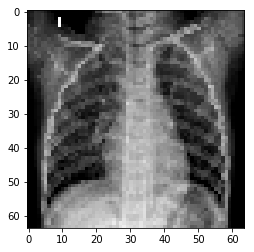

(1, 64, 64, 3)


In [21]:

img_path='C:/Users/Anbu/Desktop/resp/1.jpeg'
img = image.load_img(img_path,target_size=(64,64))


img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.
plt.imshow(img_tensor[0])
plt.show()
print(img_tensor.shape)

In [24]:
layer_outputs = [layer.output for layer in classifier.layers[:12]] 
# Extracts the outputs of the top 12 layers
activation_model = models.Model(inputs=classifier.input, outputs=layer_outputs) # Creates a model that will return these outputs, given the model input

In [25]:
activations = activation_model.predict(img_tensor) 
# Returns a list of five Numpy arrays: one array per layer activation

In [26]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 62, 62, 64)


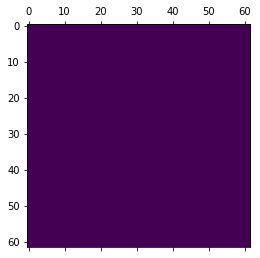

In [27]:
plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')

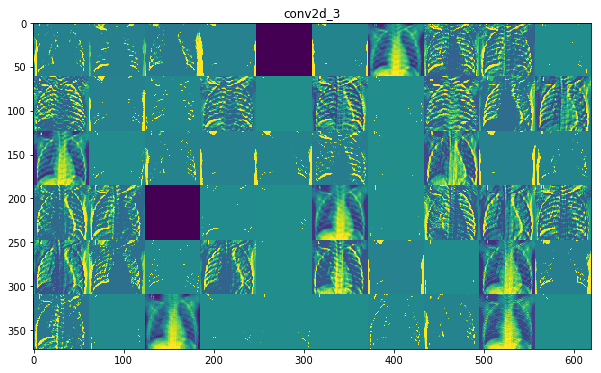

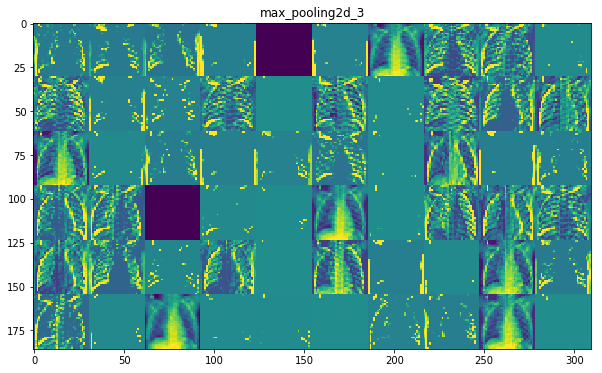

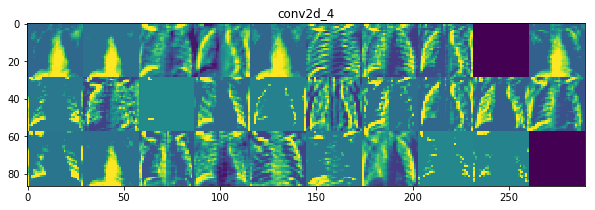

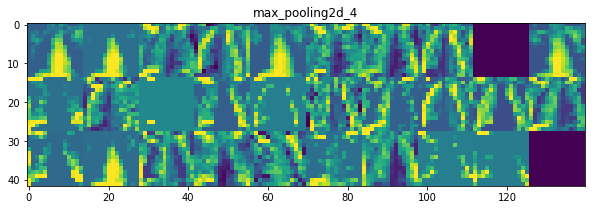

In [39]:
layer_names = []
for layer in classifier.layers[:4]:
    layer_names.append(layer.name) # Names of the layers, so you can have them as part of your plot
    
images_per_row = 10

for layer_name, layer_activation in zip(layer_names, activations): # Displays the feature maps
    n_features = layer_activation.shape[-1] # Number of features in the feature map
    size = layer_activation.shape[1] #The feature map has shape (1, size, size, n_features).
    n_cols = n_features // images_per_row # Tiles the activation channels in this matrix
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    
    for col in range(n_cols): # Tiles each filter into a big horizontal grid
        for row in range(images_per_row):
            channel_image = layer_activation[0,:, :,col * images_per_row + row]
            channel_image -= channel_image.mean() # Post-processes the feature to make it visually palatable
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size, # Displays the grid
                         row * size : (row + 1) * size] = channel_image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

In [ ]:
from keras.models import load_model

# Creates a HDF5 file 'my_model.h5'
classifier.save('cnn_model.h5')

In [5]:
# Install dependencies
!pip install graphviz
!pip install pydot pydot-ng
!echo "Double check with Python 3"
!python -c "import pydot"

"Double check with Python 3"


In [6]:
history

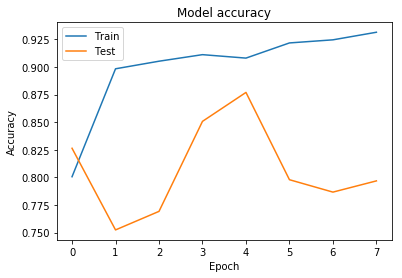

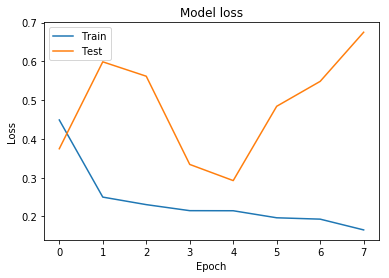

In [40]:
import matplotlib.pyplot as plt
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [41]:
import numpy as np
import tensorflow as tf

from keras.preprocessing import image

from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

training_set = train_datagen.flow_from_directory('C:/Users/anbu/Desktop/resp/chest_xray/train',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')



Found 5216 images belonging to 2 classes.


In [42]:
model = tf.keras.models.load_model("C:/Users/Anbu/Desktop/resp/cnn_model.h5")
test_image=image.load_img('C:/Users/Anbu/Desktop/resp/1.jpeg',target_size=(64,64))
test_image=image.img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
result=model.predict(test_image)
training_set.class_indices
if result[0][0]==1:
    prediction='normal'
else:
    prediction='pneumonia'
print(prediction)

pneumonia
